In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy.cluster.hierarchy import linkage,fcluster,dendrogram
import scipy.cluster.hierarchy as shc
import seaborn as sns

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#Checking for missing values
df.isnull().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [12]:
#If we want we can either remove those NaN value using dropna or replace it by median value but not required as we only need to consider CRuns col

In [5]:
#Splitting the dataset
X = df[['PROFIT']]

In [6]:
#Feature Scaling
s = StandardScaler()
X_scaled = s.fit_transform(X)

In [7]:
#Perform Hierarchical Clustering
linked = linkage(X_scaled,method='ward')

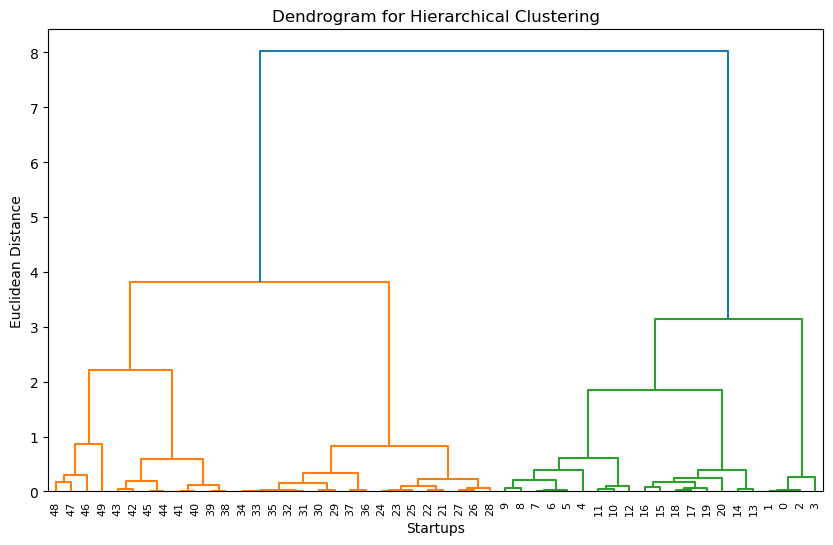

<Figure size 640x480 with 0 Axes>

In [8]:
#Dendrogram
plt.figure(figsize=(10,6))
dnd = dendrogram(linked,orientation='top',distance_sort='descending')
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Startups")
plt.ylabel("Euclidean Distance")
plt.show()
plt.savefig('dendrogram_2.png')

In [9]:
optimal_k = 3
df['Clusters'] = fcluster(linked,optimal_k,criterion='maxclust')

In [10]:
print(df['Clusters'].value_counts().sort_index())

Clusters
1    21
2    17
3    12
Name: count, dtype: int64


In [11]:
import seaborn as sns

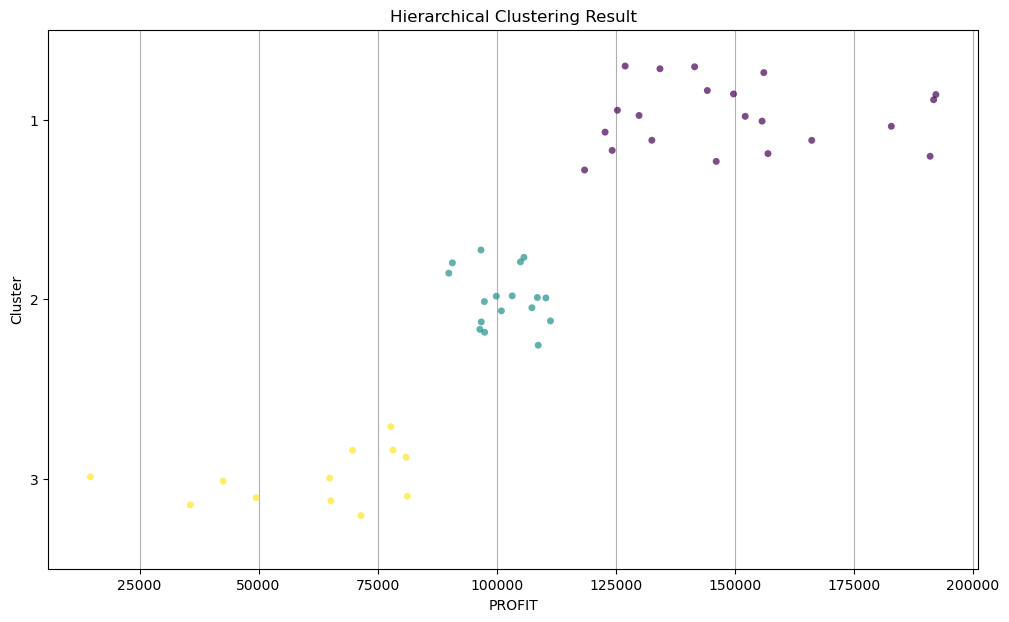

In [14]:
plt.figure(figsize=(12,7))
sns.stripplot(x='PROFIT',y='Clusters',data=df,palette='viridis',hue='Clusters',jitter=0.3,alpha=0.7,orient='h')
plt.title('Hierarchical Clustering Result')
plt.xlabel('PROFIT')
plt.ylabel('Cluster')
plt.yticks(ticks=range(optimal_k), labels=range(1,optimal_k+1))
plt.legend().remove()
plt.grid(axis='x')
plt.savefig('hierarchichal_cluster_3.png')